In [12]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read in labels file
df = pd.read_csv('Data_Entry_2017_v2020.csv')
print(df.head())
print(df.shape)

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                       

In [8]:
# Split values in the 'Finding Labels' column by '|'
split_values = df['Finding Labels'].str.split('|')

# Create a set to store unique findings
unique_findings = set()

# Iterate over each row and add the findings to the set
for values in split_values:
    unique_findings.update(values)

print("Unique findings mentioned in the 'Finding Labels' column:")
print(unique_findings)

Unique findings mentioned in the 'Finding Labels' column:
{'No Finding', 'Atelectasis', 'Pneumothorax', 'Nodule', 'Emphysema', 'Fibrosis', 'Effusion', 'Edema', 'Mass', 'Pneumonia', 'Hernia', 'Infiltration', 'Pleural_Thickening', 'Cardiomegaly', 'Consolidation'}


In [6]:
# Filter rows for only negative cases
filtered_df = df[df['Finding Labels'] == 'No Finding']
print(filtered_df.head())
print(filtered_df.shape)

         Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
3   00000002_000.png     No Finding            0           2           80   
13  00000005_000.png     No Finding            0           5           69   
14  00000005_001.png     No Finding            1           5           69   
15  00000005_002.png     No Finding            2           5           69   
16  00000005_003.png     No Finding            3           5           69   

   Patient Gender View Position  OriginalImage[Width  Height]  \
3               M            PA                 2500     2048   
13              F            PA                 2048     2500   
14              F            AP                 2500     2048   
15              F            AP                 2500     2048   
16              F            PA                 2992     2991   

    OriginalImagePixelSpacing[x     y]  
3                         0.171  0.171  
13                        0.168  0.168  
14                     

In [9]:
# Count the number of unique patients among those with 'No Finding'
unique_patients_count = filtered_df['Patient ID'].nunique()

print("Number of unique patients with 'No Finding':", unique_patients_count)

Number of unique patients with 'No Finding': 24907


In [25]:
# Group the DataFrame by 'Patient ID' and count the number of occurrences
x_ray_counts_per_patient = filtered_df.groupby('Patient ID').size()

# Sort the counts in descending order
sorted_counts = x_ray_counts_per_patient.sort_values(ascending=False)

print("X-ray counts per patient sorted in descending order:")
print(sorted_counts)

X-ray counts per patient sorted in descending order:
Patient ID
4006     59
1836     58
6271     54
4808     54
13670    54
         ..
12865     1
12866     1
12867     1
12871     1
30805     1
Length: 24907, dtype: int64


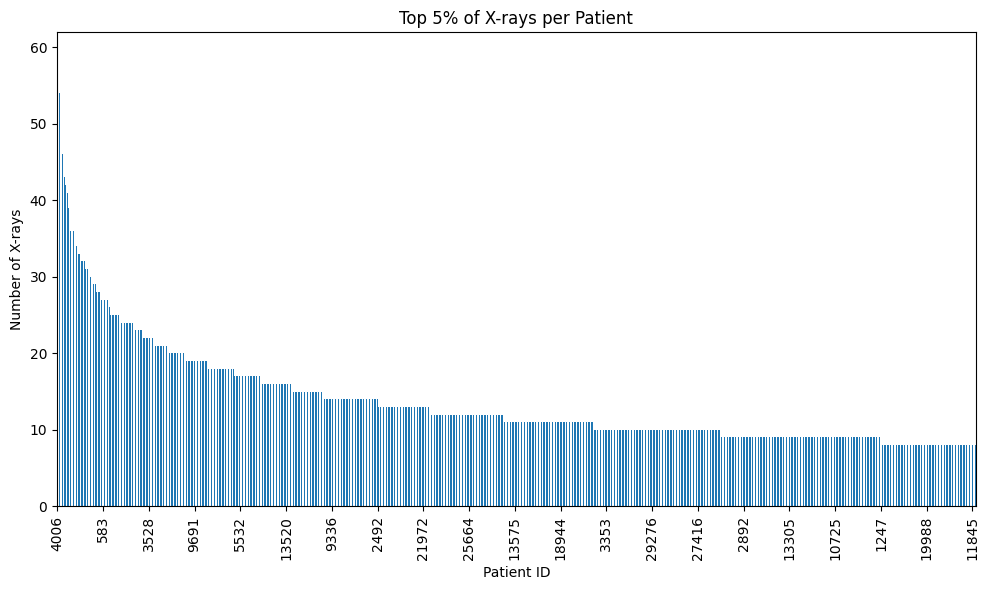

In [28]:
# Calculate the threshold count for the top 5%
threshold_count = int(0.05 * len(sorted_counts))

# Get the top 5% of counts
top_5_counts = sorted_counts.head(threshold_count)

# Plot the counts
plt.figure(figsize=(10, 6))
top_5_counts.plot(kind='bar')
plt.xlabel('Patient ID')
plt.ylabel('Number of X-rays')
plt.title('Top 5% of X-rays per Patient')
# Set fewer x-axis labels
step = max(1, len(top_5_counts) // 20)
plt.xticks(range(0, len(top_5_counts), step), top_5_counts.index[::step], rotation=90)
plt.tight_layout()
plt.show()